# `Exploring the data`
Goal: To combine similar labels to decrease the number of classes

In [11]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import json
import random
from PIL import Image
import IPython.display as display

In [12]:
df = pd.read_csv("trial_cleaning2.csv")

C:\Users\0000\AppData\Local\Temp\ipykernel_5820\2134289380.py:1: DtypeWarning: Columns (5,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("trial_cleaning2.csv")


In [13]:
df.head()

Unnamed: 0.1  Unnamed: 0                  name  object_classification  \
0             0         0.0         ear-ring bead       ear-ring ,  bead   
1             1         1.0   hair-pin dress-pin   hair-pin ,  dress-pin   
2             2         2.0    hair-pin dress-pin  hair-pin ,  dress-pin   
3             3         3.0    hair-pin dress-pin  hair-pin ,  dress-pin   
4             4         4.0              ear-ring               ear-ring   

                 date                                        Description  \
0           1stc-3rdc   Copper alloy ear-ring of thin wire with a loo...   
1  1stc bc-early 1stc   Copper alloy ornamental hair- or dress-pin he...   
2  1stc bc-early 1stc   Copper alloy ornamental hair- or dress-pin he...   
3  1stc bc-early 1stc   Copper alloy ornamental hair- or dress-pin he...   
4           1stc-3rdc   Cast, copper alloy hoop ear-ring bound with t...   

       material Cultures/periods                   path location period  \
0  copper alloy              NaN  bri_A_1880-3687-m.jpg      NaN    NaN   
1  copper alloy              NaN  bri_A_1880-3711-o.jpg      NaN    NaN   
2  copper alloy              NaN  bri_A_1880-3714-a.jpg      NaN    NaN   
3  copper alloy              NaN  bri_A_1880-3717-f.jpg      NaN    NaN   
4  copper alloy              NaN    bri_A_1880-3960.jpg      NaN    NaN   

  description dynasty  
0         NaN     NaN  
1         NaN     NaN  
2         NaN     NaN  
3         NaN     NaN  
4         NaN     NaN

In [14]:
def print_value_count(df, col, range):
    x =df[col].value_counts()
    plt.figure(figsize=(12,8))
    plt.xticks(rotation=90)
    plt.bar(x = x.index[0:range] ,  height= x.values[0:range])
    return x.index[0:range]

In [15]:
import os

def find_path_image(value):
    base_path = os.path.join(os.getcwd(), os.pardir)
    if value[0:3] == 'bri':
        return os.path.join(base_path, 'BritishMuseum', 'photo', value)
    elif value[0:3] == 'glo':
        return os.path.join(base_path, 'GlobalEgyptianMuseum', 'photo', value)
    elif value[0:3] == 'met':
        return os.path.join(base_path, 'MetMuseum', 'photo', value)
    elif value[0:3] == 'ros':
        return os.path.join(base_path, 'RosicruicanMuseum', 'photo', value)
    else:
        return "error"

In [16]:
def show_images(df, col, equal, num_images_per_row=10, num_rows=4, label_fontsize=8):
    try:
       
        # Filter the DataFrame (for example, based on the 'Count' column)
        filtered_df = df[df[col] == equal]
        print(equal, len(filtered_df) )
        # Randomly select rows for the specified number of images
        num_images = num_images_per_row * num_rows
        random_sample = random.sample(range(len(filtered_df)), min(num_images, len(filtered_df)))
        selected_rows = filtered_df.iloc[random_sample]

        # Create a num_rows x num_images_per_row subplot grid
        fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(15, 3 * num_rows))

        # Display the images in the grid
        for i, (index, row) in enumerate(selected_rows.iterrows()):
            try:
                img_path = find_path_image(row['path'])
                img = Image.open(img_path)

                # Get the current subplot axes
                ax = axes[i // num_images_per_row, i % num_images_per_row]

                # Display the image and set the title as the image name with reduced font size
                ax.imshow(img)
                ax.set_title(row['path'], fontsize=label_fontsize)
                ax.axis('off')  # Turn off axis labels
            except Exception as img_load_error:
                print(f"Error loading image at index {index}: {img_load_error}")
                # If there's an error loading an image, display a placeholder or skip the current subplot
                ax = axes[i // num_images_per_row, i % num_images_per_row]
                ax.text(0.5, 0.5, "Image Error", ha='center', va='center', transform=ax.transAxes)
                ax.axis('off')  # Turn off axis labels

        # Adjust layout for better spacing
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("ERROR: " + str(e))

In [17]:
def combine_values(df, column_name, values_to_combine, new_value):
    """
    Combine specified values in a DataFrame column into a new value.

    Parameters:
    - df (pd.DataFrame): The DataFrame.
    - column_name (str): The name of the column to modify.
    - values_to_combine (list): A list of values to combine.
    - new_value (str): The new value to assign to the combined values.
    """
    df[column_name] = df[column_name].apply(lambda x: new_value if x in values_to_combine else x)

In [18]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'name', 'object_classification', 'date',
       'Description', 'material', 'Cultures/periods', 'path', 'location',
       'period', 'description', 'dynasty'],
      dtype='object')

## `Object Classification`

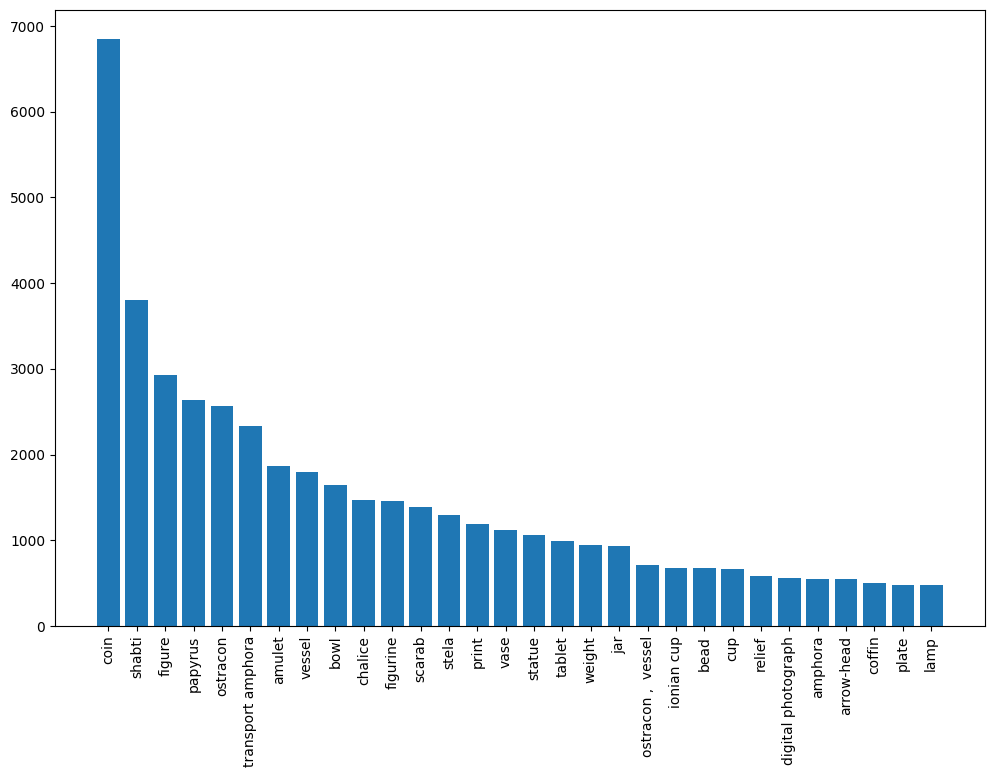

In [19]:
top30_pbject = print_value_count(df, "object_classification", 30)

### `Visualize the object types`

In [20]:
# for i in top30_pbject:
#     show_images(df,"object_classification", i)

### `Combine similar objects`

In [21]:
top30_pbject

Index(['coin', 'shabti', 'figure', 'papyrus', 'ostracon', 'transport amphora',
       'amulet', 'vessel', 'bowl', 'chalice', 'figurine', 'scarab', 'stela',
       'print', 'vase', 'statue', 'tablet', 'weight', 'jar',
       'ostracon ,  vessel', 'ionian cup', 'bead', 'cup', 'relief',
       'digital photograph', 'amphora', 'arrow-head', 'coffin', 'plate',
       'lamp'],
      dtype='object', name='object_classification')

In [22]:
combine_values(df, "object_classification", ['ostracon','transport amphora','bowl', 'chalice','ionian cup', 'cup', 'jar', 'amphora', 'vase', 'vessel', "ostracon ,  vessel", "plate", "dish" ], "vessel") # combined all the items that are like containers
combine_values(df, "object_classification", ['shabti','figure', 'figurine', 'statue', "amulet ,  figure", "human figurine" ], "statue") #all are status of faces 
combine_values(df,"object_classification", ['stela','relief','papyrus' ], "inscription" ) #combined all materials that have written text on
combine_values(df, "object_classification", ['print', 'drawing', 'drawing ,  print study'], "art") # both are art pieces drawn in similar style
combine_values(df, "object_classification", ['amulet', 'scarab', 'bead', 'ear-rings', "necklace"], "accessories")

Index(['vessel', 'statue', 'coin', 'inscription', 'accessories', 'art',
       'tablet', 'weight', 'digital photograph', 'arrow-head', 'coffin',
       'lamp', 'krater', 'oinochoe', 'canopic jar', 'coptic textile',
       'kantharos', 'animal', 'mummy-label', 'column krater', 'net-sinker',
       'postcard', 'cowroid', 'oil-lamp', 'seal-impression', 'blade', 'dinos',
       'neck-amphora', 'unknown', 'finger-ring'],
      dtype='object', name='object_classification')


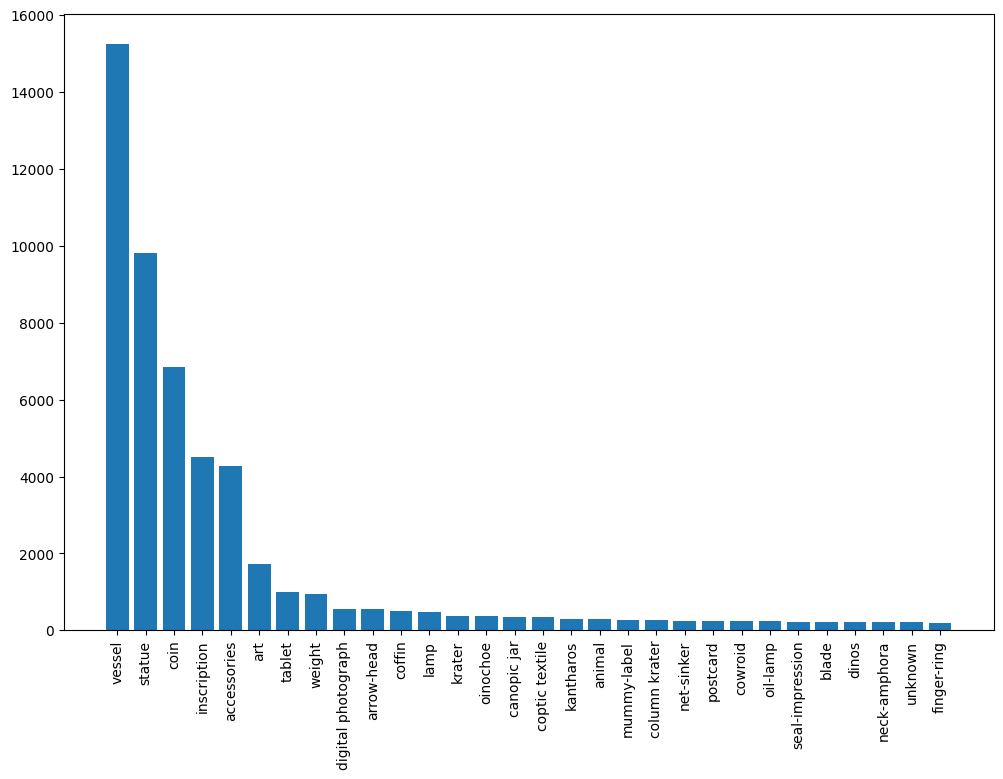

In [23]:
top30_object_new = print_value_count(df, "object_classification", 30)
print(top30_object_new)

In [24]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'name', 'object_classification', 'date',
       'Description', 'material', 'Cultures/periods', 'path', 'location',
       'period', 'description', 'dynasty'],
      dtype='object')

In [25]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed:')]

In [26]:
df.columns

Index(['name', 'object_classification', 'date', 'Description', 'material',
       'Cultures/periods', 'path', 'location', 'period', 'description',
       'dynasty'],
      dtype='object')

In [27]:
df.to_csv("cleaned_object_classification.csv", index=False)

## `Material`
1. picked top 50 materials
2. used ChatGPT to tell me if a material scientist would categorize them how will he do so
3. and then saw images and only combined ones that are similar

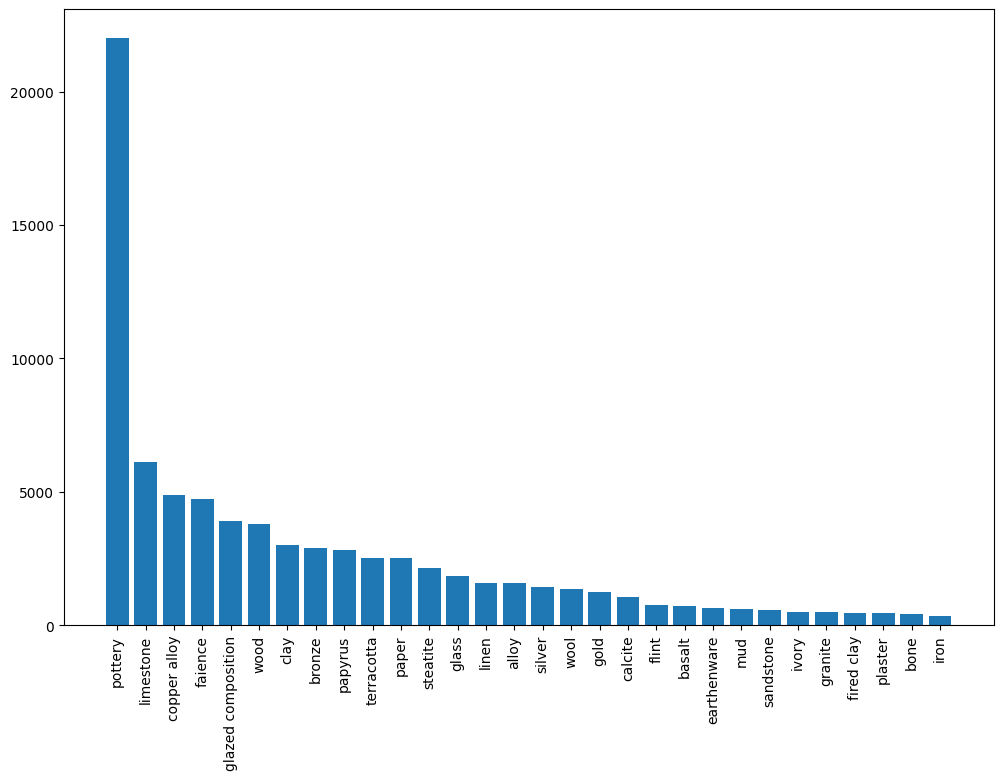

In [28]:
top30_material = print_value_count(df, "material", 30)

### `visualize and combine`

In [30]:
# for i in list(top30_material):
    # show_images(df, "material",i, num_rows=4)

In [31]:
df["material_metalCombined"] = df["material"]
combine_values(df, "material_metalCombined",["copper alloy", "alloy", "cupreous metal", "silver", "bronze", "gold", "copper"], "metal" )
combine_values(df, "material",["copper alloy", "alloy", "cupreous metal"], "copper")
combine_values(df, "material", ["paper", "papyrus"], "paper")  
combine_values(df, "material", ["linen", "wool"], "textile")

### `New vis`

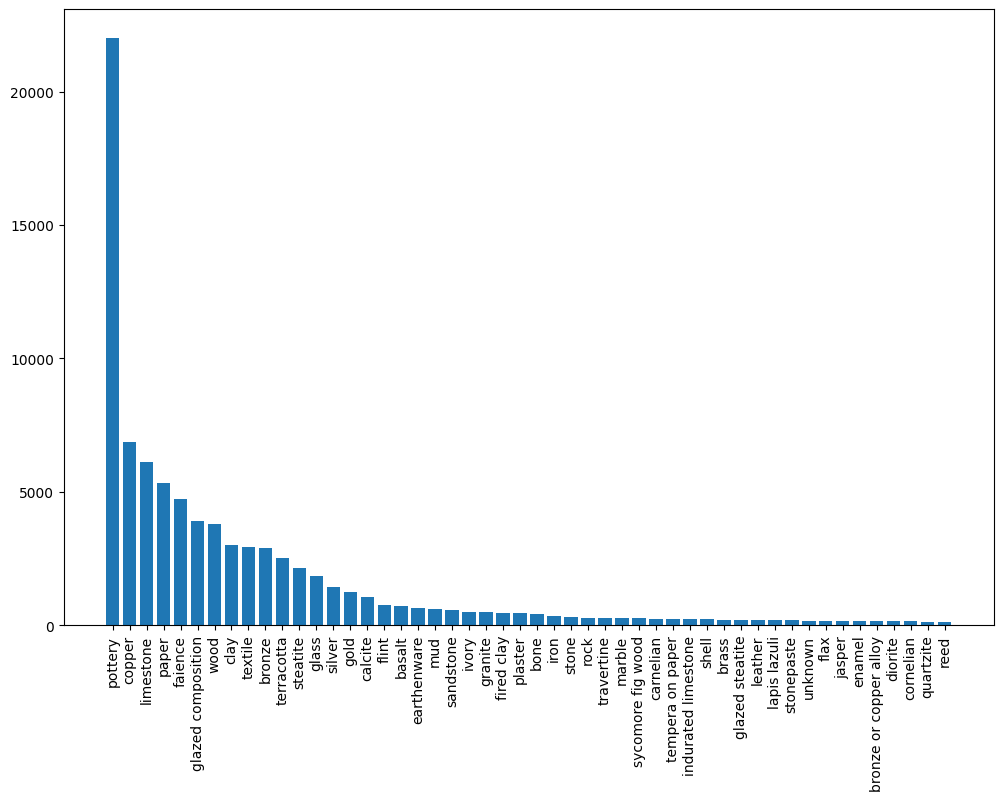

In [32]:
top50_material = print_value_count(df, "material", 50)

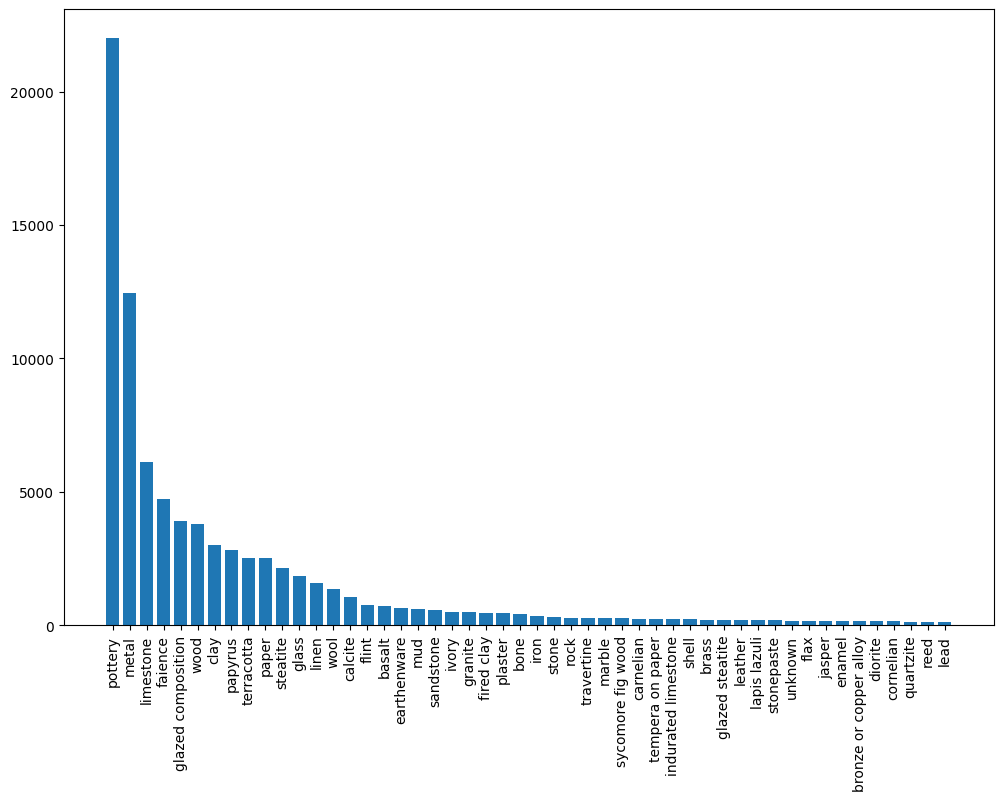

In [33]:
top50_material = print_value_count(df, "material_metalCombined", 50)

In [34]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed:')] 

In [35]:
len(df)

88736

In [36]:
df.to_csv("DATASET_FINAL_v1.csv", index=False) 

In [37]:
df = pd.read_csv("DATASET_FINAL_v1.csv", dtype=str, low_memory=False)

In [38]:
df.columns

Index(['name', 'object_classification', 'date', 'Description', 'material',
       'Cultures/periods', 'path', 'location', 'period', 'description',
       'dynasty', 'material_metalCombined'],
      dtype='object')

In [39]:
len(df)

88736

## `Date`
1. visualize
2. extract the numbers in a list along with the type of dating
3. normalize all the dates to the same standard
4. create ranges

In [40]:
df = pd.read_csv("DATASET_FINAL_v1.csv", dtype=str, low_memory=False)

In [41]:
index_to_change = df[df["date"] == "18061811"].index[0]

# Change the value in the cell at the found index and the "date" column to a new value
new_date_value = "1806-1811"  # Replace with the new date value
df.loc[index_to_change, "date"] = new_date_value

Index(['1390-1352 bc', '6500bc-6000bc', '1479-1458 bc', '600 bc-570 bc',
       '575bc-550bc', '1981-1640 bc', '6thc bc', '610bc-580bc', '1550-1295 bc',
       '117-138', '600bc-550bc', '570bc-560bc', '2030-1640 bc', '138-161',
       '600bc-570bc', '1353-1336 bc', '990-970 bc', '14th-15th century',
       '3rd-4th century', '1295-1070 bc', '1981-1975 bc', '7thc-8thc',
       '6thc-8thc', '664-30 bc', '5th-6th century', '1050 bc', '1802',
       '550bc-525bc', '664-610 bc', '630bc-600bc', '6th-7th century',
       '3rdc bc-1stc bc', '664-332 bc', '14thc', '620 bc-31 bc', '97-117',
       '3rdc bc-2ndc bc', '4th-5th century', '580bc-570bc', '600bc-575bc',
       '580bc-540bc', '620 bc-300 bc', '2ndc bc-1stc bc', '1stc-2ndc',
       '222-235', '595bc-570bc', '560bc-550bc', '3850-2960 bc', '14thc-15thc',
       '1830s-1840s'],
      dtype='object', name='date')

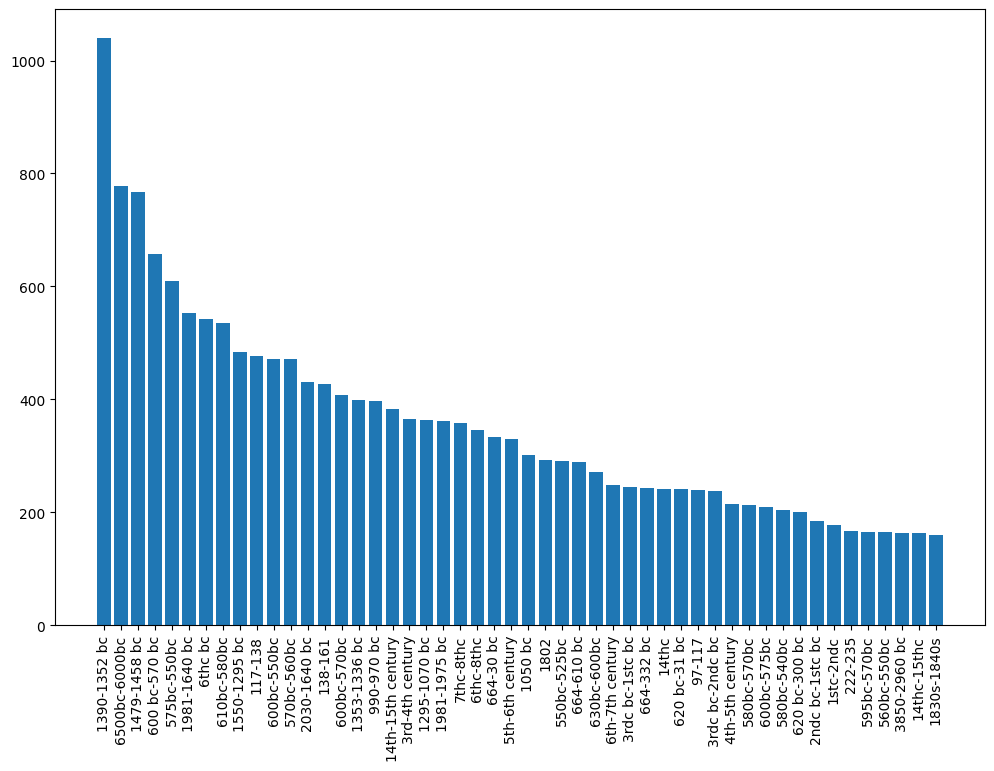

In [42]:
print_value_count(df, "date", 50)

In [43]:
import re
def convert_century_to_years(century_str):
    # Extract the century number from the input string
    century_str = str(century_str)
    century_number = int(re.search(r'\d+', century_str).group())

    # Calculate the start and end years of the century
    start_year = (century_number - 1) * 100 + 1
    end_year = century_number * 100
    l = [start_year, end_year]

    return l

In [44]:

def date_clean(value):
    try:
        numbers = []

        # Split the string based on non-digit characters
        num_list = [int(num) for num in re.findall(r'\d+', value)]

        # Add the extracted numbers to the list
        numbers.extend(num_list)
        

        # Sort the list of numbers
        numbers.sort()
        months_list = ["ce","ac", "ad","january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
        # Check conditions based on substrings in the value
        if "bc" in value.lower() or "bce" in value.lower() or "dynasty" in value.lower():
            if any(substring in value.lower() for substring in ["century", "th", "2nd", "1st"]):
                num = []
                for i in numbers:
                    x = str(i)
                    xth = x+"th"
                    xst = x+"st"
                    xnd = x+ "nd"
                    
                    if x.isnumeric() == True and (xth in value.lower() or xst in value.lower() or xnd in value.lower()):
                        num.extend(convert_century_to_years(i))
                num.sort()
                if len(num) > 0:
                    numbers.clear()
                    numbers = num 
            numbers.append("bc")
        elif any(month in value.lower() for month in months_list):  #"26th may 2006  ,  december 2000"
            n=[]
            for i in numbers:
                if len(str(i)) == 4:
                    n.append(i)
            numbers.clear()
            numbers = n
            numbers.append("ad")
        elif any(substring in value.lower() for substring in ["century", "th", "nd", "st"]):
            num = []
            for i in numbers:
                x = str(i)
                xth = x+"th"
                xst = x+"st"
                xnd = x+ "nd"
                if x.isnumeric() == True and (xth in value.lower() or xst in value.lower() or xnd in value.lower()):
                    num.extend(convert_century_to_years(i))
            num.sort()
            print(num)
            if len(num) > 0:
                numbers.clear()
                numbers = num
            numbers.append("ad")
       
        else:
            numbers.append("ad")
        if len(numbers) > 3:
            numbers = [numbers[0], numbers[-2], numbers[-1]]
        return numbers
    except Exception as e:
        print(f"An error occurred: {e}")

### `Binary Classification Column`

In [45]:
def binary_classification(value):
    try:
        new_value = date_clean(value)
        if len(new_value) == 0:
            return 'unknown'
        elif new_value[-1] == 'bc':
            return 'bc'
        elif new_value[-1] == 'ad':
            return 'ad'
        else:
            return 'unknown'
    except:
        return 'unknown' 
        

In [46]:
df["date_binary"] = df["date"].apply(binary_classification)


[1, 100]
[1, 100]
[1, 100]
[101, 200]
[1, 100]
[1601, 1700]
[1501, 1600]
[1601, 1700]
[1601, 1700]
[901, 1000, 1101, 1200]
[1901, 2000]
[1901, 2000]
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expe


An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected string or bytes-like object, got 'float'
An error occurred: expected strin

In [47]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed:')] 

In [48]:
x = df.loc[:,["date", "date_binary"]]
x.to_csv("frequency/date_bianry.csv",index=False)

Index(['unknown', 'bc', 'ad'], dtype='object', name='date_binary')

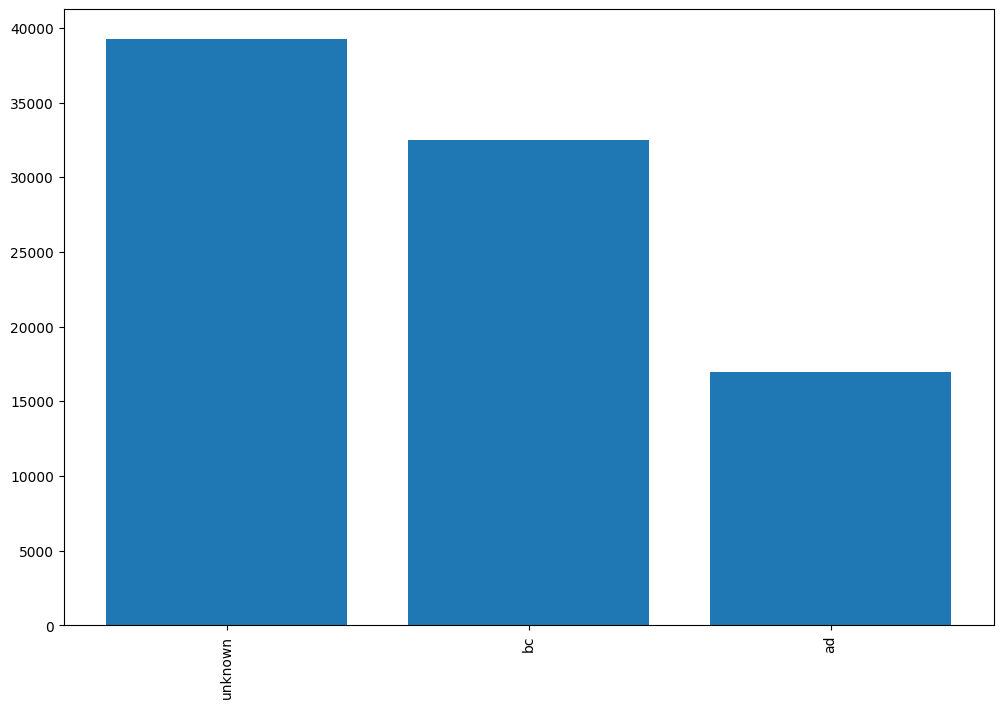

In [49]:
print_value_count(df.loc[:,["date", "date_binary"]], "date_binary", 50)

### `Regression Cleaning`

In [50]:
def calculate_mean(new_value , mul):
    if len(new_value)  == 3 and type(new_value[0]) == int and type(new_value[1]) == int:
        return np.mean([new_value[0], new_value[1]])*mul
    elif len(new_value)  == 2 and type(new_value[0]) :
        return new_value[0]*mul
    else:
        return None
  

In [51]:
def regression_date(value):
    try:
        new_value = date_clean(value)
        print(new_value)
        if new_value[-1] == "ad":
            return calculate_mean(new_value, 1)
        elif new_value[-1] == "bc":
            return calculate_mean(new_value, -1)
        else:
            return None
    except:
        return None

In [52]:
print(regression_date("1stc-3rdc"))

[1, 100]
[1, 100, 'ad']
50.5


In [53]:
df["date_regression"] = df["date"].apply(regression_date)

[1, 100]
[1, 100, 'ad']
[1, 100, 'bc']
[1, 100, 'bc']
[1, 100, 'bc']
[1, 100]
[1, 100, 'ad']
[1, 100]
[1, 100, 'ad']
[101, 200]
[101, 200, 'ad']
[1, 100]
[1, 100, 'ad']
[1601, 1700]
[1601, 1700, 'ad']
[1, 100, 'bc']
[1800, 1870, 'ad']
[1, 100, 'bc']
[1800, 1870, 'ad']
[1, 100, 'bc']
[101, 400, 'bc']
[200, 600, 'bc']
[1501, 1600]
[1501, 1600, 'ad']
[1800, 1870, 'ad']
[1601, 1700]
[1601, 1700, 'ad']
[1800, 1870, 'ad']
[1601, 1700]
[1601, 1700, 'ad']
[200, 600, 'bc']
[1, 100, 'bc']
[901, 1000, 1101, 1200]
[901, 1200, 'ad']
[1, 100, 'bc']
[1, 100, 'bc']
[101, 400, 'bc']
[200, 600, 'bc']
[200, 600, 'bc']
[1829, 'ad']
[101, 400, 'bc']
[1829, 'ad']
[1912, 1913, 'ad']
[101, 400, 'bc']
[1912, 1913, 'ad']
[101, 400, 'bc']
[1901, 2000]
[1901, 2000, 'ad']
[1974, 'ad']
[1901, 2000]
[1901, 2000, 'ad']
[200, 600, 'bc']
[1800, 1857, 'ad']
[1800, 1876, 'ad']
[1800, 1857, 'ad']
[1800, 1857, 'ad']
[1800, 1877, 'ad']
[1912, 1913, 'ad']
[1800, 1877, 'ad']
[1800, 1835, 'ad']
[1800, 1897, 'ad']
An error occu

[550, 575, 'bc']
[550, 575, 'bc']
[550, 575, 'bc']
[560, 570, 'bc']
[550, 610, 'bc']
[600, 630, 'bc']
[560, 610, 'bc']
[550, 610, 'bc']
[600, 630, 'bc']
[560, 570, 'bc']
[560, 570, 'bc']
[570, 610, 'bc']
[575, 600, 'bc']
[550, 575, 'bc']
[550, 575, 'bc']
[580, 610, 'bc']
[580, 610, 'bc']
[575, 600, 'bc']
[600, 615, 'bc']
[570, 610, 'bc']
[580, 610, 'bc']
[580, 610, 'bc']
[600, 620, 'bc']
[600, 610, 'bc']
[550, 575, 'bc']
[580, 610, 'bc']
[580, 610, 'bc']
[570, 610, 'bc']
[580, 610, 'bc']
[580, 610, 'bc']
[550, 575, 'bc']
[600, 630, 'bc']
[580, 610, 'bc']
[560, 610, 'bc']
[580, 610, 'bc']
[560, 570, 'bc']
[580, 610, 'bc']
[580, 610, 'bc']
[580, 630, 'bc']
[570, 580, 'bc']
[600, 620, 'bc']
[560, 570, 'bc']
[550, 575, 'bc']
[590, 610, 'bc']
[570, 580, 'bc']
[580, 610, 'bc']
[560, 570, 'bc']
[600, 630, 'bc']
[560, 570, 'bc']
[580, 610, 'bc']
[600, 620, 'bc']
[560, 570, 'bc']
[575, 600, 'bc']
[580, 610, 'bc']
[560, 570, 'bc']
[600, 630, 'bc']
[550, 575, 'bc']
[550, 575, 'bc']
[550, 575, 'bc

In [54]:
y = df.loc[:,["date","date_regression"]]

In [55]:
y.to_csv("frequency/date_regression.csv")

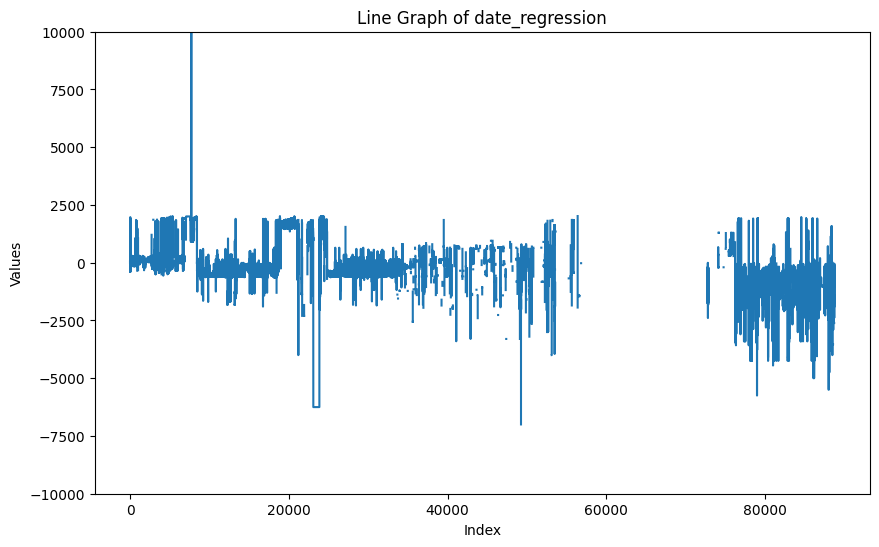

In [56]:

# Convert "date_regression" to float
df['date_regression'] = df['date_regression'].astype("float")

# Set the size of the plot
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a line graph
plt.plot(df['date_regression'])
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Graph of date_regression')

# Set y-axis limits
plt.ylim(-10000, 10000)

plt.show()


In [57]:
# Find the maximum and minimum values in the 'column_name' column
max_value = df['date_regression'].max()
min_value = df['date_regression'].min()

# Print the results
print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

Maximum value: 10366.5
Minimum value: -7000.0


### `Multiclass classification`

In [58]:
df2 = df.dropna(subset=['date_regression'], inplace=False)

Bin Edges: [-7017.3665 10366.5   ]
Bin Edges: [-7017.3665  1683.25   10366.5   ]
Bin Edges: [-7017.3665     -1211.16666667  4577.66666667 10366.5       ]
Bin Edges: [-7017.3665 -2658.375   1683.25    6024.875  10366.5   ]
Bin Edges: [-7017.3665 -3526.7      -53.4     3419.9     6893.2    10366.5   ]
Bin Edges: [-7017.3665     -4105.58333333 -1211.16666667  1683.25
  4577.66666667  7472.08333333 10366.5       ]
Bin Edges: [-7017.3665     -4519.07142857 -2038.14285714   442.78571429
  2923.71428571  5404.64285714  7885.57142857 10366.5       ]
Bin Edges: [-7017.3665 -4829.1875 -2658.375   -487.5625  1683.25    3854.0625
  6024.875   8195.6875 10366.5   ]
Bin Edges: [-7017.3665     -5070.38888889 -3140.77777778 -1211.16666667
   718.44444444  2648.05555556  4577.66666667  6507.27777778
  8436.88888889 10366.5       ]


C:\Users\0000\AppData\Local\Temp\ipykernel_5820\3846881175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date_multi_class'], bin_edges = pd.cut(df2['date_regression'], bins=i, labels=False, retbins=True)


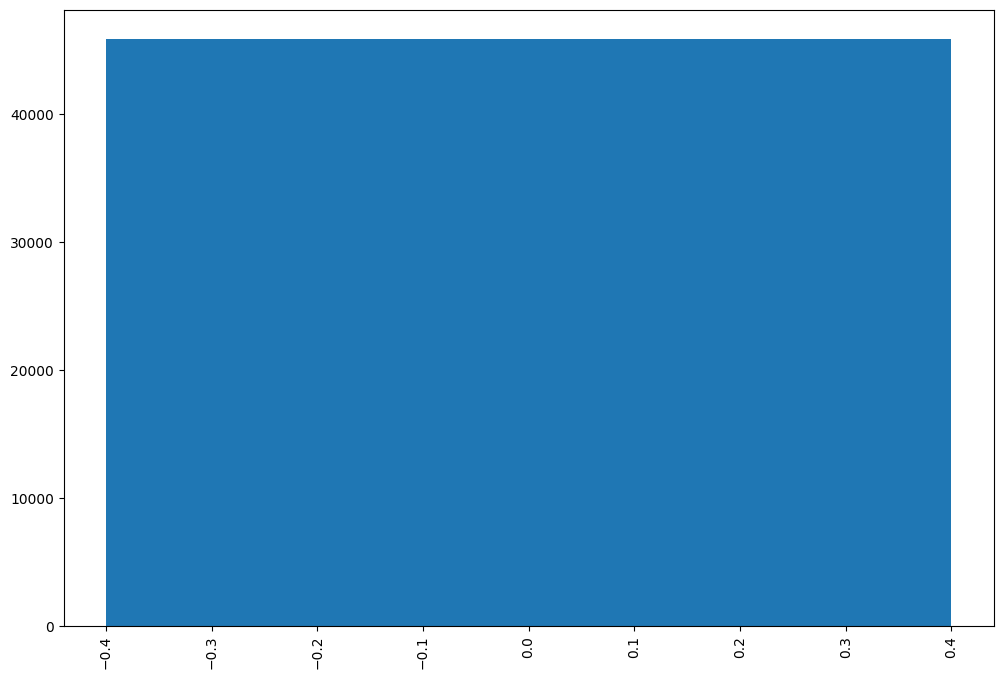

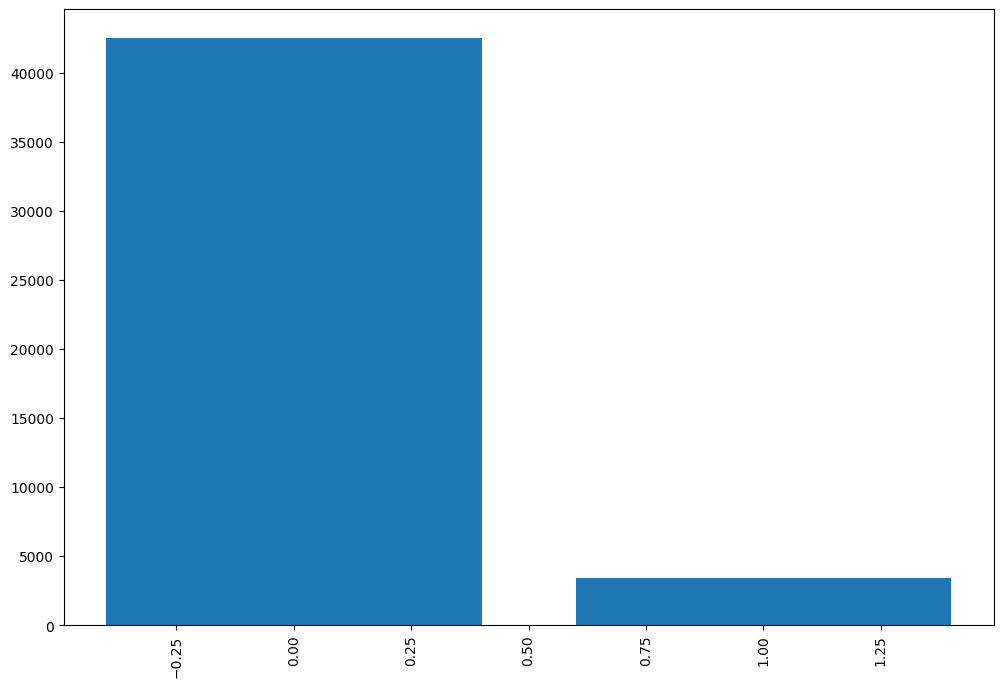

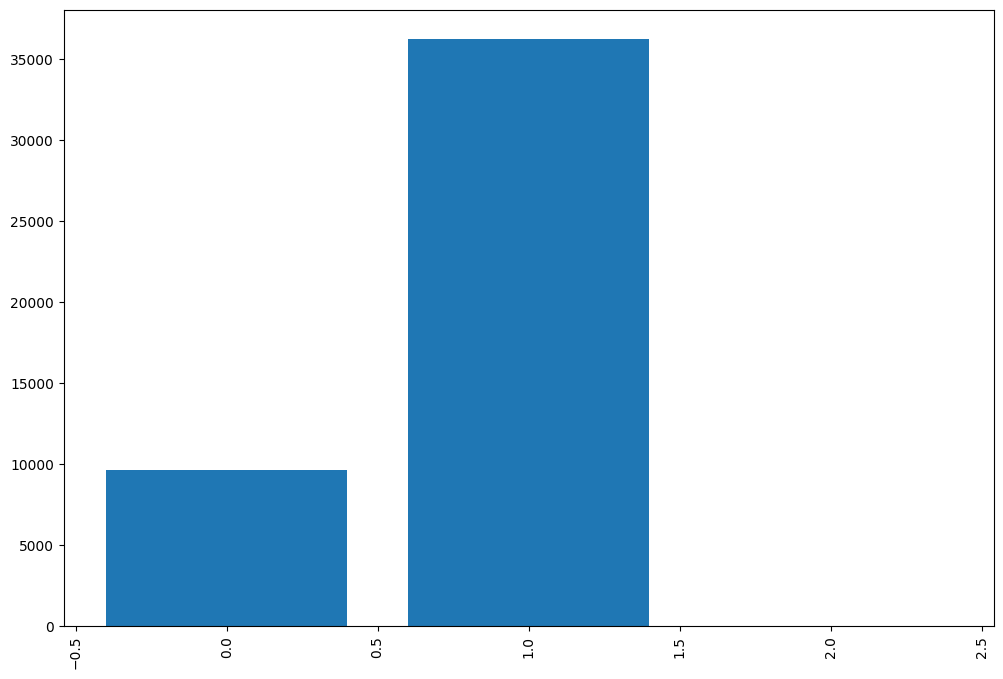

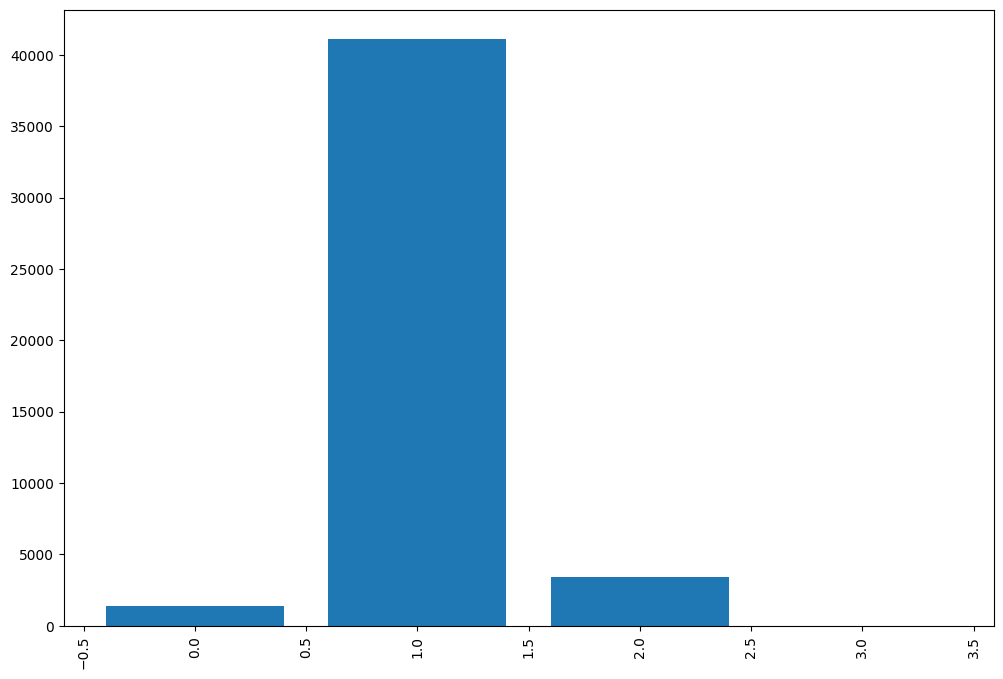

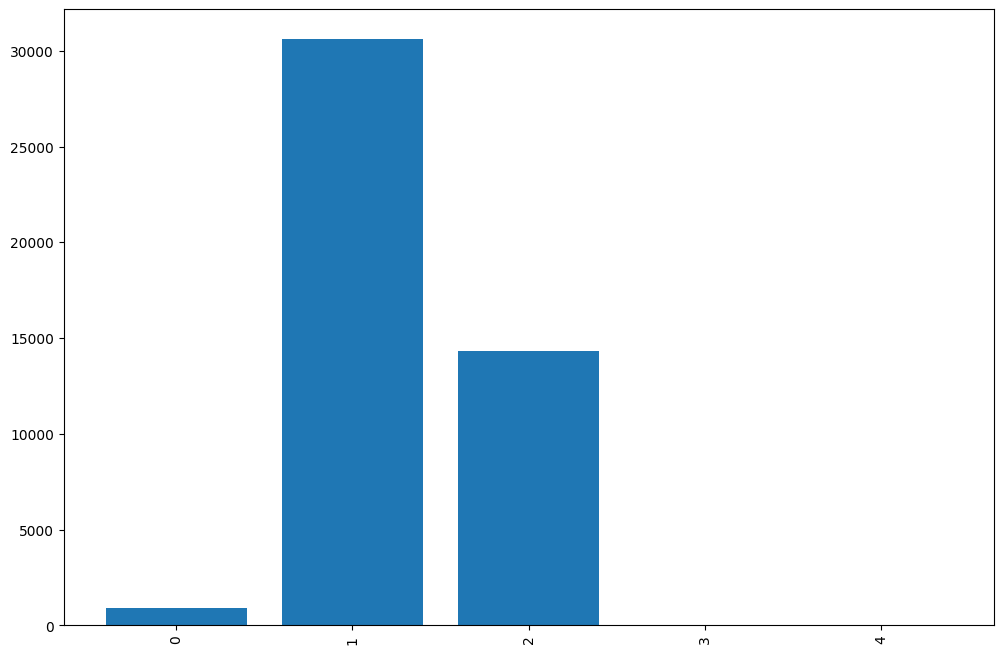

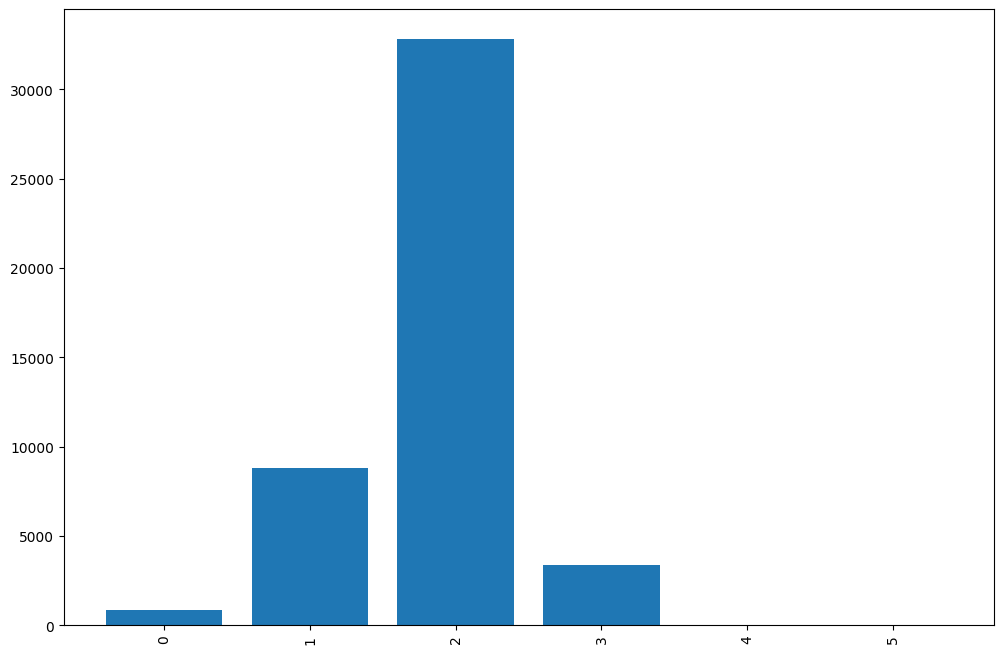

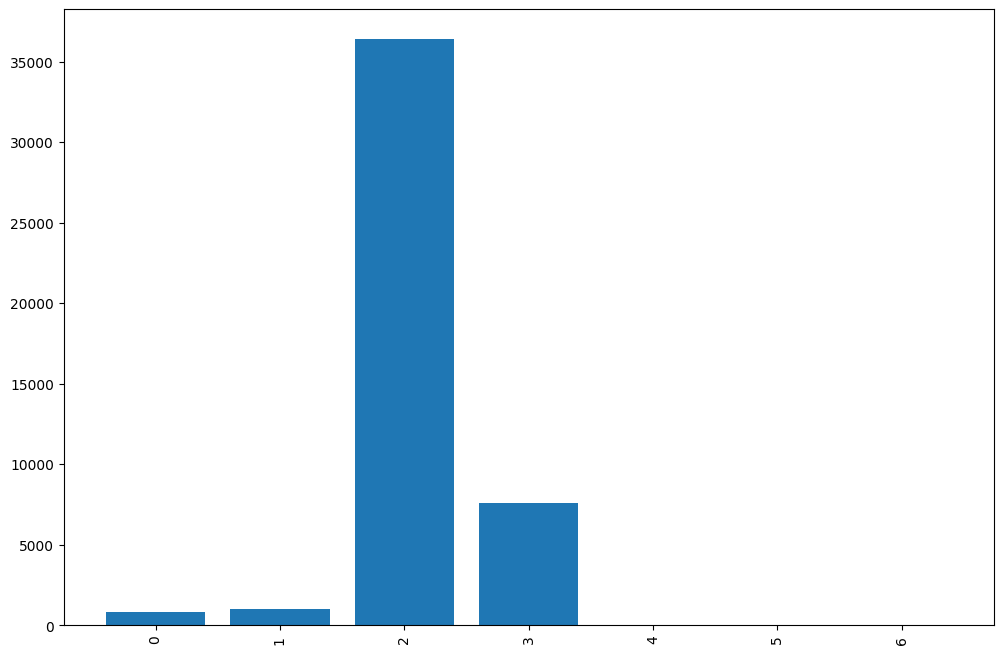

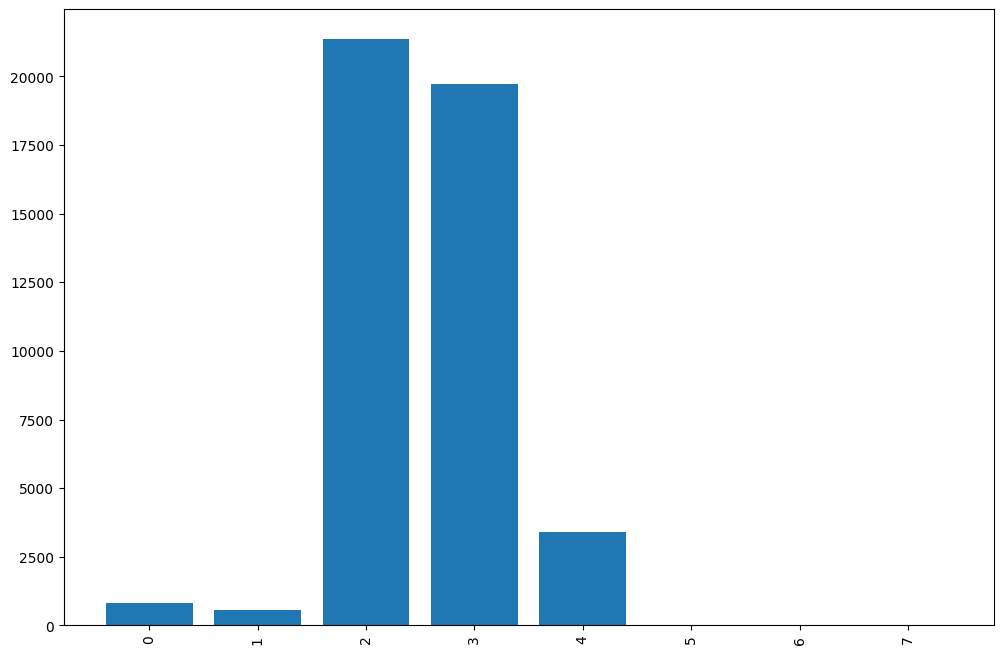

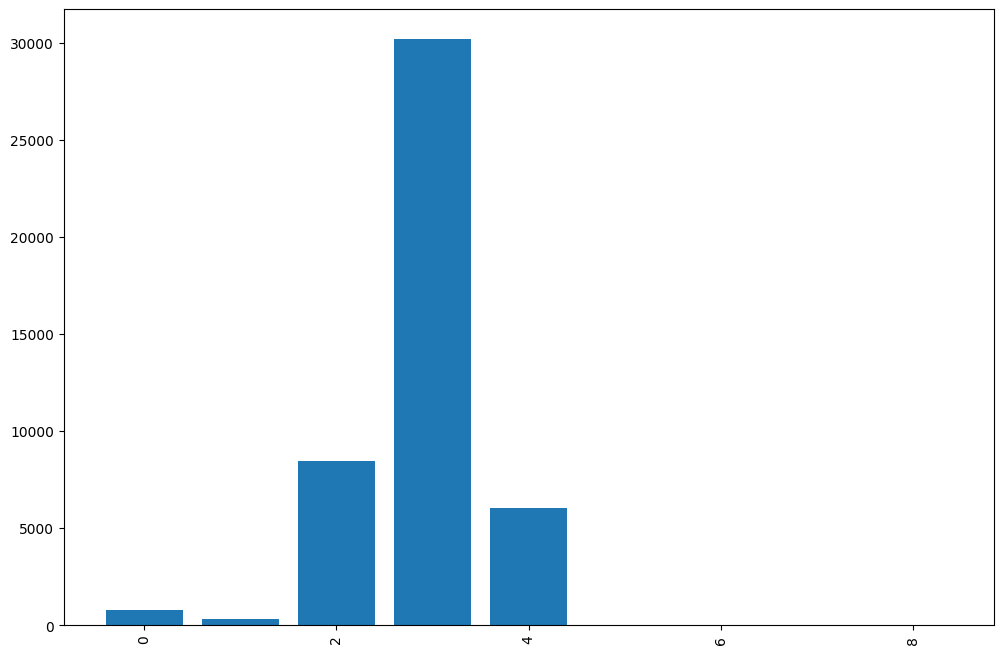

In [59]:
for i in range(1,10):
    # Now, use pd.cut with 3 bins
    df2['date_multi_class'], bin_edges = pd.cut(df2['date_regression'], bins=i, labels=False, retbins=True)

    # Display the bin edges
    print("Bin Edges:", bin_edges)
    print_value_count(df2, 'date_multi_class', i)

In [60]:
# Convert 'date_regression' column to numeric and replace NaN with zero
df['date_regression'] = pd.to_numeric(df['date_regression'], errors='coerce').fillna(0)

In [61]:
df['date_multi_class'], bin_edges = pd.cut(df['date_regression'], bins=i, labels=False, retbins=True)

In [62]:
df.head(10)

name  object_classification                date  \
0         ear-ring bead       ear-ring ,  bead           1stc-3rdc   
1   hair-pin dress-pin   hair-pin ,  dress-pin  1stc bc-early 1stc   
2    hair-pin dress-pin  hair-pin ,  dress-pin  1stc bc-early 1stc   
3    hair-pin dress-pin  hair-pin ,  dress-pin  1stc bc-early 1stc   
4              ear-ring               ear-ring           1stc-3rdc   
5         ear-ring bead       ear-ring ,  bead           1stc-3rdc   
6                  bead            accessories                2ndc   
7              ear-ring               ear-ring           1stc-3rdc   
8                  coin                   coin               17thc   
9    hair-pin dress-pin  hair-pin ,  dress-pin  1stc bc-early 1stc   

                                         Description material  \
0   Copper alloy ear-ring of thin wire with a loo...   copper   
1   Copper alloy ornamental hair- or dress-pin he...   copper   
2   Copper alloy ornamental hair- or dress-pin he...   copper   
3   Copper alloy ornamental hair- or dress-pin he...   copper   
4   Cast, copper alloy hoop ear-ring bound with t...   copper   
5   Copper alloy ear-ring of thin wire with a loo...   copper   
6   Two small beads of opaque turquoise glass; on...    glass   
7   Cast, copper alloy hoop ear-ring bound with t...   copper   
8   Copper alloy, 17th-century, anonymous civic c...   copper   
9   Copper alloy ornamental hair- or dress-pin he...   copper   

  Cultures/periods                         path location period description  \
0              NaN        bri_A_1880-3687-m.jpg      NaN    NaN         NaN   
1              NaN        bri_A_1880-3711-o.jpg      NaN    NaN         NaN   
2              NaN        bri_A_1880-3714-a.jpg      NaN    NaN         NaN   
3              NaN        bri_A_1880-3717-f.jpg      NaN    NaN         NaN   
4              NaN          bri_A_1880-3960.jpg      NaN    NaN         NaN   
5              NaN        bri_A_1880-4109-q.jpg      NaN    NaN         NaN   
6              NaN          bri_A_1880-4121.jpg      NaN    NaN         NaN   
7              NaN          bri_A_1880-4124.jpg      NaN    NaN         NaN   
8              NaN  bri_A_1891-0701-466-472.jpg      NaN    NaN         NaN   
9              NaN      bri_A_1901-0608-176.jpg      NaN    NaN         NaN   

  dynasty material_metalCombined date_binary  date_regression  \
0     NaN                  metal          ad             50.5   
1     NaN                  metal          bc            -50.5   
2     NaN                  metal          bc            -50.5   
3     NaN                  metal          bc            -50.5   
4     NaN                  metal          ad             50.5   
5     NaN                  metal          ad             50.5   
6     NaN                  glass          ad            150.5   
7     NaN                  metal          ad             50.5   
8     NaN                  metal          ad           1650.5   
9     NaN                  metal          bc            -50.5   

   date_multi_class  
0                 3  
1                 3  
2                 3  
3                 3  
4                 3  
5                 3  
6                 3  
7                 3  
8                 4  
9                 3

### Cleaing Cultures/periods column

##### Importing used libraries

In [135]:
import re
import json
from ast import literal_eval

In [136]:
def clean(string:str):
    temp = re.sub(r"\(+(.*?)\)+","",string)
    temp = re.sub(r"\s+\'","'",temp)
    temp = re.sub(r"\s+\"","\"",temp)
    temp = re.sub(r"\'\s+","'",temp)
    temp = re.sub(r"\"\s+","\"",temp)
    return re.sub(r"\s+"," ",temp).strip()

In [147]:
df_v2 = df.copy()

In [148]:
df_v2["Cultures/periods"].value_counts()

Cultures/periods
[' East Greek ', ' Archaic Greek ']                                                          4849
['Roman Provincial']                                                                         3764
['New Kingdom']                                                                              2752
['Coptic']                                                                                   2576
['Hellenistic']                                                                              2288
                                                                                             ... 
['21st Dynasty (Claiming to be 18th Dynasty)']                                                  1
[' Early Corinthian (very late) ', ' Middle Corinthian (first half) ', ' Archaic Greek ']       1
[' Middle Corinthian (probably) ', ' Archaic Greek ']                                           1
[' Late Helladic II ', ' Late Helladic IIIA ', ' Late Helladic IIIB ']                          1
[' 

In [149]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88736 entries, 0 to 88735
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    84362 non-null  object 
 1   object_classification   73491 non-null  object 
 2   date                    49457 non-null  object 
 3   Description             56835 non-null  object 
 4   material                87965 non-null  object 
 5   Cultures/periods        50528 non-null  object 
 6   path                    88736 non-null  object 
 7   location                15909 non-null  object 
 8   period                  28318 non-null  object 
 9   description             26071 non-null  object 
 10  dynasty                 15518 non-null  object 
 11  material_metalCombined  87965 non-null  object 
 12  date_binary             88736 non-null  object 
 13  date_regression         88736 non-null  float64
 14  date_multi_class        88736 non-null

In [150]:
with open("./pathes.json","r") as file:
    pathes = json.load(file)
pathes = pathes[3:]
pathes_dict = {}
for path in pathes:
    pathes_dict[os.path.basename(path)] = path

In [151]:
df_v2["path"] = df_v2["path"].map(lambda x:pathes_dict[x])

#### sort the list to avoid duplicates 

In [152]:
print(df_v2["Cultures/periods"][44129])
print(df_v2["Cultures/periods"][44257])

[' 11th Dynasty (?) ', ' 12th Dynasty (?) ']
[' 12th Dynasty (?) ', ' 11th Dynasty (?) ']


In [153]:
df_v2["Cultures/periods"] = df_v2["Cultures/periods"].map(lambda x: '-'.join(sorted(literal_eval(clean(x)))) if type(x) == str else x)

In [154]:
print(df_v2["Cultures/periods"][44129])
print(df_v2["Cultures/periods"][44257])

11th Dynasty-12th Dynasty
11th Dynasty-12th Dynasty


In [155]:
df.to_csv("DATASET_FINAL_v2.csv", index = False)
df_v2.to_csv("DATASET_FINAL_v2_kaggle.csv", index = False)